# Project to make the best candy

Here we have some data showing us the most popular candy. The study involved taking a survey of about 269,000 randomly generated matchups, pitting each candy against one another, 1-on-1. This proposal is to take the best elements of each candy archetype and use that information and putting out even better candy.

Most candy comes in two different types, those being a singular bar or unit such as a chocolate bar or something defined by this data as a pluribus -- one of many candies in a box or bag. The plan is to formulate two types of new candy and put out a survey, similar to 

In [184]:
import pandas as pd
from matplotlib import pyplot as plt
import math
import seaborn as sns
import re
%matplotlib inline

In [177]:
data = pd.read_csv('candy-data.csv')
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [167]:
data['competitorname'] = data['competitorname'].apply(lambda x: x.replace('Õ',"'"))

In [178]:
data = data.sort_values('winpercent', ascending = False).reset_index(drop=True)
data

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,ReeseÕs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
1,ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
2,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
3,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
4,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
5,ReeseÕs pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990
6,Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556
7,ReeseÕs stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901
8,Peanut butter M&MÕs,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050
9,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.604,0.767,70.735641


In [169]:
candy_bar = data[data.bar==1].reset_index(drop=True)
candy_bar_mean = candy_bar.head().mean()

In [218]:
pluribus = data[data.pluribus==1].sort_values(by='winpercent').reset_index(drop=True)
pluribus_mean = pluribus.head().mean()

In [219]:
xnot_bar = data[data.bar==0]
neither = not_bar[not_bar.pluribus==0].reset_index(drop=True)
neither_mean = neither.head().mean()

In [220]:
means = pd.DataFrame({'candy_bar_mean':candy_bar_mean, 'pluribus_mean':pluribus_mean, 'neither_mean':neither_mean})
means

,candy_bar_mean,pluribus_mean,neither_mean
chocolate,1.000000,0.000000,0.600000
fruity,0.000000,0.600000,0.400000
caramel,0.600000,0.000000,0.000000
peanutyalmondy,0.400000,0.200000,0.600000
nougat,0.400000,0.000000,0.000000
crispedricewafer,0.400000,0.000000,0.000000
hard,0.000000,0.400000,0.000000
bar,1.000000,0.000000,0.000000
pluribus,0.000000,1.000000,0.000000
sugarpercent,0.522600,0.276200,0.583000


### The top performing flavors
By taking the top 5 of each of these groups, then averaging them out, we can find the most important factors of each group and focus in on those traits. As seen here, by far the most well performing flavor included in these is chocolate, included in the majority of each candy. Another noteable trait is those with nuts, appearing is most of these as well. The amount of sugar stays just about the same across the board.

Another trend we see here is the prices of each item is the highest when considering bars of candy as opposed to the other two archetypes. Also, price for each of the candies trended downward the further they were down the list.

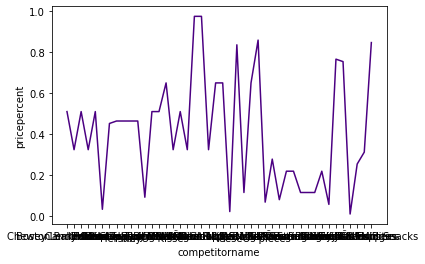

In [221]:
sns.lineplot(x='competitorname',y="pricepercent",data=pluribus,color="indigo")